<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/Capstone_Coursera_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to the Project<p>
Data prepare and some exploratory analysis<p>
Part 1 of predictive analytics - Logistic Regression / Classification Tree / Artificial Neural Network

In [ ]:
# importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('data-capstone-project.csv')
df.head()

,id,member_id,term,purpose,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
0,62286683,66483442,36 months,credit_card,Fully Paid,24000,7.89,750.86,MORTGAGE,237500.0,Source Verified,28279,36.9,25,5,24948.45
1,46314315,49422035,36 months,credit_card,Fully Paid,8000,6.68,245.85,RENT,41000.0,Not Verified,24377,51.0,29,2,8351.63
2,51317198,54726945,36 months,credit_card,Fully Paid,12175,9.17,388.13,MORTGAGE,100000.0,Not Verified,21329,64.6,17,3,13205.91
3,42984750,45981489,36 months,credit_card,Charged Off,6400,6.92,197.38,RENT,41900.0,Source Verified,14936,73.2,15,1,3550.38
4,42181434,45138158,36 months,credit_card,Fully Paid,12600,6.68,387.22,OWN,73800.0,Not Verified,9904,20.7,25,4,13125.77


In [ ]:
df.describe()

,id,member_id,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
count,7.151000e+03,7.151000e+03,7151.000000,7151.000000,7151.000000,7.151000e+03,7151.000000,7148.000000,7151.000000,7151.000000,7151.000000
mean,5.106186e+07,5.453440e+07,13579.373514,10.431779,440.715538,7.624496e+04,18807.828695,53.768145,25.880856,4.894840,12830.463838
std,9.419570e+06,1.003211e+07,8148.555935,3.316630,266.743864,5.456859e+04,26051.747852,22.725538,12.494253,3.237648,8946.447110
min,5.800840e+05,7.457430e+05,1000.000000,5.320000,30.850000,8.000000e+03,0.000000,0.000000,4.000000,0.000000,0.000000
25%,4.229390e+07,4.525578e+07,7500.000000,7.890000,243.130000,4.500000e+04,7328.500000,36.900000,17.000000,3.000000,6162.895000
50%,5.044621e+07,5.381612e+07,11425.000000,9.990000,367.190000,6.500000e+04,12781.000000,53.500000,24.000000,4.000000,10605.060000
75%,5.923142e+07,6.311782e+07,18600.000000,12.690000,609.360000,9.300000e+04,22059.000000,70.900000,33.000000,7.000000,17410.045000
max,6.861588e+07,7.351869e+07,35000.000000,25.800000,1309.490000,1.900000e+06,838698.000000,113.100000,100.000000,25.000000,44465.780010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7151 entries, 0 to 7150
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7151 non-null   int64  
 1   member_id             7151 non-null   int64  
 2   term                  7151 non-null   object 
 3   purpose               7151 non-null   object 
 4   loan_status           7151 non-null   object 
 5   loan_amnt             7151 non-null   int64  
 6   int_rate              7151 non-null   float64
 7   installment           7151 non-null   float64
 8   home_ownership        7151 non-null   object 
 9   annual_inc            7151 non-null   float64
 10  verification_status   7151 non-null   object 
 11  revol_bal             7151 non-null   int64  
 12  revol_util            7148 non-null   float64
 13  total_acc             7151 non-null   int64  
 14  acc_open_past_24mths  7151 non-null   int64  
 15  total_pymnt          

**Data visualization and feature enigineering**

In [ ]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

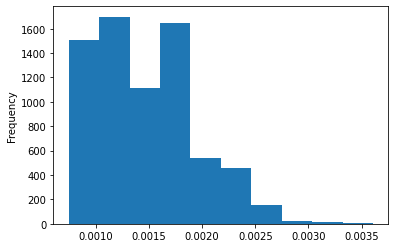

In [ ]:
# the distirubtion of the interest rates

(df['int_rate']/len(df)).plot.hist(bins=10)

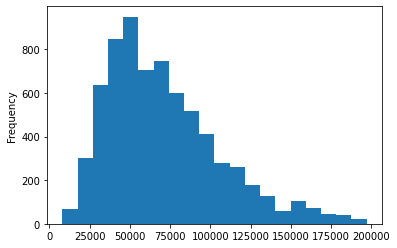

In [ ]:
#the distribution of the annual income

df[df['annual_inc']<200000]['annual_inc'].plot.hist(bins=20)
df['annual_inc_log'] = df['annual_inc'].apply(np.log)

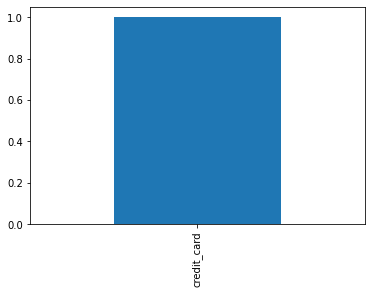

In [ ]:
#the most common reasons for requesting a loan

(df['purpose'].value_counts()/len(df)).plot.bar()

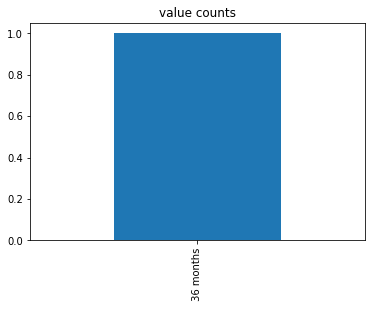

In [ ]:
#the distribution of loan term

(df['term'].value_counts()/len(df)).plot.bar(title='value counts')

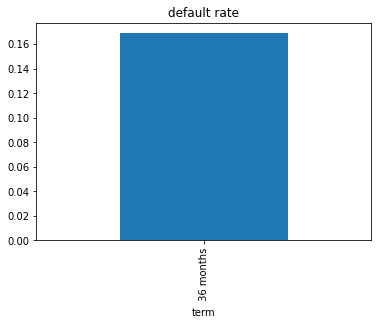

In [ ]:
#connection between term and default rate

df.groupby('term')['loan_status_bin'].mean().plot.bar(title='default rate')

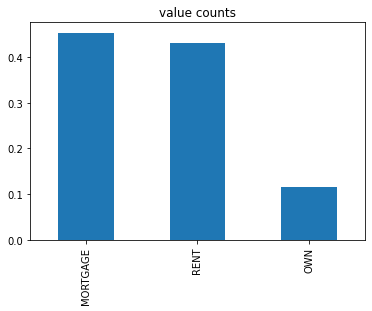

In [ ]:
#the distribution of home_ownership feature

(df['home_ownership'].value_counts()/len(df)).plot.bar(title='value counts')

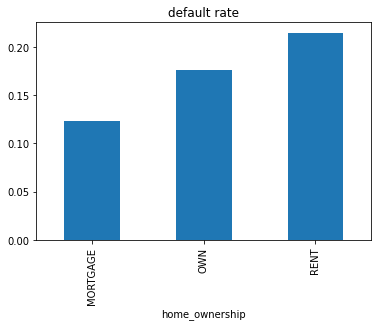

In [ ]:
#connection between home_ownership feature and default rate

df[(df['home_ownership']=='MORTGAGE') | (df['home_ownership']=='OWN')| (df['home_ownership']=='RENT')].groupby('home_ownership')['loan_status_bin'].mean().plot.bar(title='default rate')

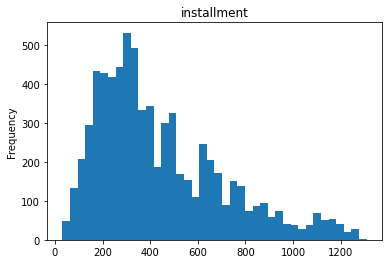

In [ ]:
#the distribution of installment (An installment loan is a type of agreement or contract involving a 
# loan that is repaid over time with a set number of scheduled payments; normally at least two payments are made towards the loan)

df['installment'].plot.hist(bins=40, title='installment')

#### **Analyzing the correlation of variables**

We need to evaluate the correlation of variables to choose what variables are important to our analysis.

In [ ]:
# creating the correlation matrix
corr = df[['loan_amnt','loan_status_bin','int_rate','installment','annual_inc','revol_bal','revol_util','total_acc','acc_open_past_24mths','total_pymnt']].corr()

display(corr);

,loan_amnt,loan_status_bin,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
loan_amnt,1.000000,-0.004724,-0.041333,0.995326,0.483276,0.395275,0.177364,0.200950,-0.015990,0.856810
loan_status_bin,-0.004724,1.000000,0.252500,0.016832,-0.088692,-0.009795,0.096824,-0.050518,0.066983,-0.431933
int_rate,-0.041333,0.252500,1.000000,0.041290,-0.182067,-0.051679,0.242527,-0.119385,0.235519,-0.125500
installment,0.995326,0.016832,0.041290,1.000000,0.466313,0.389799,0.196304,0.192030,0.004276,0.842035
annual_inc,0.483276,-0.088692,-0.182067,0.466313,1.000000,0.402516,0.093870,0.224708,0.046810,0.451082
revol_bal,0.395275,-0.009795,-0.051679,0.389799,0.402516,1.000000,0.210632,0.177145,-0.018022,0.347495
revol_util,0.177364,0.096824,0.242527,0.196304,0.093870,0.210632,1.000000,-0.138673,-0.246194,0.124033
total_acc,0.200950,-0.050518,-0.119385,0.192030,0.224708,0.177145,-0.138673,1.000000,0.429553,0.186729
acc_open_past_24mths,-0.015990,0.066983,0.235519,0.004276,0.046810,-0.018022,-0.246194,0.429553,1.000000,-0.042410
total_pymnt,0.856810,-0.431933,-0.125500,0.842035,0.451082,0.347495,0.124033,0.186729,-0.042410,1.000000


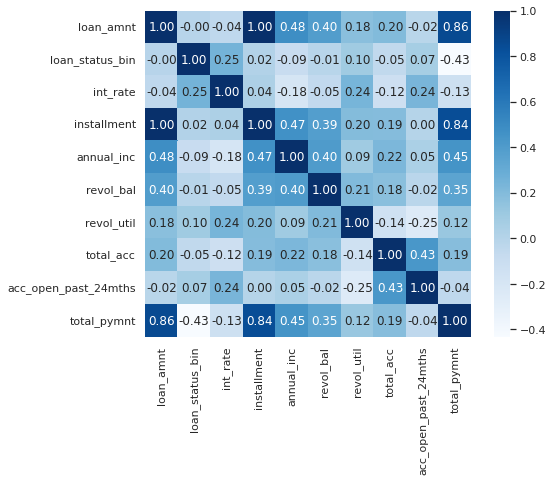

In [ ]:
# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

Lets clean our dataframe!!

In [ ]:
# creating a copy of the dataframe
df_clean = df.copy()

#dropping 'id','member_id', 'purpose', 'term', 'annual_inc_log' and 'loan_status_bin'
df_clean.drop(columns=['id','member_id','purpose','term', 'annual_inc_log', 'loan_status_bin'], inplace=True)
# ordering the varibles by missing values in descending order
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

revol_util              0.00042
loan_status             0.00000
loan_amnt               0.00000
int_rate                0.00000
installment             0.00000
home_ownership          0.00000
annual_inc              0.00000
verification_status     0.00000
revol_bal               0.00000
total_acc               0.00000
acc_open_past_24mths    0.00000
total_pymnt             0.00000
dtype: float64

In [ ]:
#excluding null values from our dataframe
df_clean.dropna(axis=0, inplace=True)

In [ ]:
# identifying the size of the new dataframe
print('Entries:\t {}'.format(df_clean.shape[0]))
print('Variables:\t {}\n'.format(df_clean.shape[1]))
# checking for missing values
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

Entries:	 7148
Variables:	 12



loan_status             0.0
loan_amnt               0.0
int_rate                0.0
installment             0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
acc_open_past_24mths    0.0
total_pymnt             0.0
dtype: float64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7148 entries, 0 to 7150
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_status           7148 non-null   object 
 1   loan_amnt             7148 non-null   int64  
 2   int_rate              7148 non-null   float64
 3   installment           7148 non-null   float64
 4   home_ownership        7148 non-null   object 
 5   annual_inc            7148 non-null   float64
 6   verification_status   7148 non-null   object 
 7   revol_bal             7148 non-null   int64  
 8   revol_util            7148 non-null   float64
 9   total_acc             7148 non-null   int64  
 10  acc_open_past_24mths  7148 non-null   int64  
 11  total_pymnt           7148 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 726.0+ KB


### **Identifying and cleaning the outliers**

To address the outliers of this dataset, we will analyze the statistical distribution, plot boxplots and calculate the limits using the IQR Score rule.

First, let's remember what the IQR is.

The IQR is calculated by subtracting the Third Quartile (75%) from the First Quartile (25%).

## IQR = Q3 - Q1

So, Lets go!

In [ ]:
# verifying the statistic distribution of **df_clean**
df_clean.describe().round(1)

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
count,7148.0,7148.0,7148.0,7148.0,7148.0,7148.0,7148.0,7148.0,7148.0
mean,13583.1,10.4,440.8,76253.8,18815.7,53.8,25.9,4.9,12834.0
std,8148.1,3.3,266.7,54575.2,26054.4,22.7,12.5,3.2,8946.5
min,1000.0,5.3,30.8,8000.0,0.0,0.0,4.0,0.0,0.0
25%,7500.0,7.9,243.4,45000.0,7334.0,36.9,17.0,3.0,6163.6
50%,11475.0,10.0,367.3,65000.0,12796.5,53.5,24.0,4.0,10607.1
75%,18612.5,12.7,609.4,93000.0,22061.5,70.9,33.0,7.0,17412.2
max,35000.0,25.8,1309.5,1900000.0,838698.0,113.1,100.0,25.0,44465.8


After analyse the distribution of the dataframe some insights came up:

* The maximum value of `annual_inc` is 1,900,000. Probably we are gonna need to deal with some outliers in this variable.
* The maximum value of `revol_bal` is 8,368,698. We must have outliers here too.
* The variables `installment`, `revol_util`, `total_acc`, `acc_open_past_24mths` and `total_pymnt` may have outliers too and we will evaluate them



*   Loan Amount



In [ ]:
# working with the variable loan_amnt
q1_loan_amnt = df_clean.loan_amnt.quantile(.25)
q3_loan_amnt = df_clean.loan_amnt.quantile(.75)
IQR_loan_amnt = q3_loan_amnt - q1_loan_amnt
print('IQR of Loan Amount ', IQR_loan_amnt)

# setting the limits
up_loan_amnt = q3_loan_amnt + 1.5 * IQR_loan_amnt
low_loan_amnt = q1_loan_amnt - 1.5 * IQR_loan_amnt

print('Upper fence Loan Amount ', up_loan_amnt)
print('Lower fence Loan Amount ', low_loan_amnt)

IQR of Loan Amount  11112.5
Upper fence Loan Amount  35281.25
Lower fence Loan Amount  -9168.75


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `loan_amnt`, let's discart the lower fence.

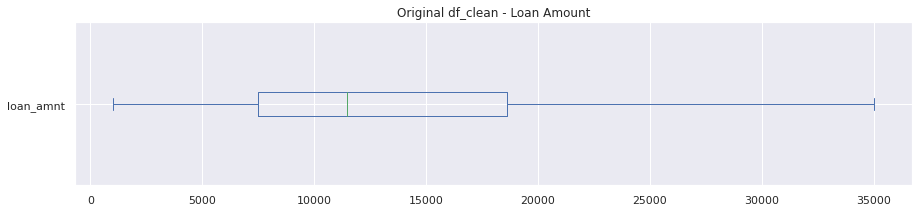

The dataset has (7148, 12) columns
0 Entries above Upper Fence
The Entries represent 0.00% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.loan_amnt.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Loan Amount')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.loan_amnt > 35281.25])))
print('The Entries represent {:.2f}% of df_clean'.format((len(df_clean[df_clean.loan_amnt > 35281.25]) / df_clean.shape[0])*100))



*   Interest Rate



In [ ]:
# working with the variable int_rate
q1_int_rate = df_clean.int_rate.quantile(.25)
q3_int_rate = df_clean.int_rate.quantile(.75)
IQR_int_rate = q3_int_rate - q1_int_rate
print('IQR of Interest Rate ', IQR_int_rate)

# setting the limits
up_int_rate = q3_int_rate + 1.5 * IQR_int_rate
low_int_rate = q1_int_rate - 1.5 * IQR_int_rate

print('Upper fence Interest Rate ', up_int_rate)
print('Lower fence Interest Rate ', low_int_rate)

IQR of Interest Rate  4.8
Upper fence Interest Rate  19.89
Lower fence Interest Rate  0.6900000000000004


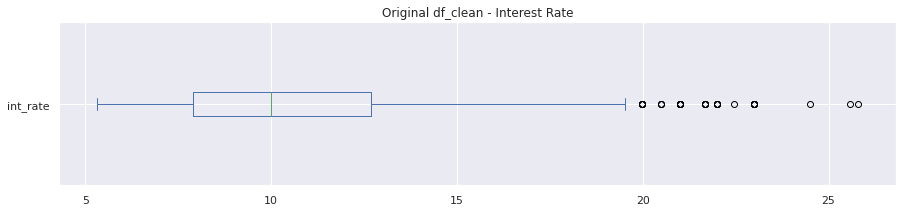

The dataset has (7148, 12) columns
36 Entries above Upper Fence
0 Entries under Lower Fence
The Entries above Upper Fence represent 0.50% of df_clean
The Entries under Lower Fence represent 100.00% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.int_rate.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Interest Rate')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.int_rate > 19.89])))
print('{} Entries under Lower Fence'.format(len(df_clean[df_clean.int_rate < 0.69])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean[df_clean.int_rate > 19.89]) / df_clean.shape[0])*100))
print('The Entries under Lower Fence represent {:.2f}% of df_clean'.format((len(df_clean[df_clean.int_rate > 0.69]) / df_clean.shape[0])*100))

*   Installment

In [ ]:
# working with the variable installment
q1_installment = df_clean.installment.quantile(.25)
q3_installment = df_clean.installment.quantile(.75)
IQR_installment = q3_installment - q1_installment
print('IQR of Installment ', IQR_installment)

# setting the limits
up_installment = q3_installment + 1.5 * IQR_installment
low_installment = q1_installment - 1.5 * IQR_installment

print('Upper fence Installment ', up_installment)
print('Lower fence Installment ', low_installment)

IQR of Installment  365.96750000000003
Upper fence Installment  1158.3112500000002
Lower fence Installment  -305.5587500000001


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `installment`, let's discart the lower fence.

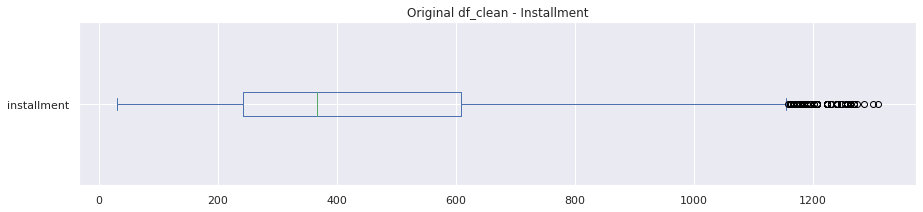

The dataset has (7148, 12) columns
122 Entries above Upper Fence
The Entries above Upper Fence represent 1.71% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.installment.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Installment')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.installment > 1158.31])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean
[df_clean.installment > 1158.31]) / df_clean.shape[0])*100))



*   Annual Income



In [ ]:
# working with the variable annual_inc
q1_annual_inc = df_clean.annual_inc.quantile(.25)
q3_annual_inc = df_clean.annual_inc.quantile(.75)
IQR_annual_inc = q3_annual_inc - q1_annual_inc
print('IQR of Loan Amount ', IQR_annual_inc)

# setting the limits
up_annual_inc = q3_annual_inc + 1.5 * IQR_annual_inc
low_annual_inc = q1_annual_inc - 1.5 * IQR_annual_inc

print('Upper fence Loan Amount ', up_annual_inc)
print('Lower fence Loan Amount ', low_annual_inc)

IQR of Loan Amount  48000.0
Upper fence Loan Amount  165000.0
Lower fence Loan Amount  -27000.0


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `annual_inc`, let's discart the lower fence.

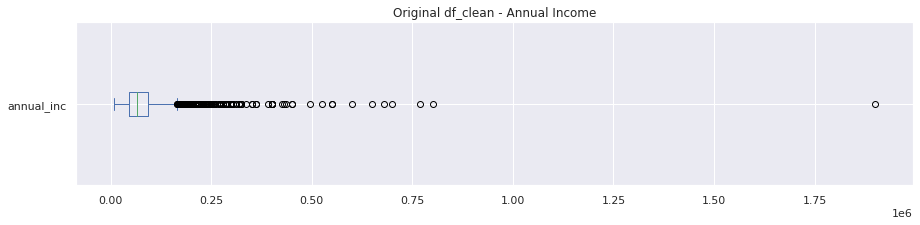

The dataset has (7148, 12) columns
301 Entries above Upper Fence
The Entries above Upper Fence represent 4.21% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.annual_inc.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Annual Income')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.annual_inc > 165000])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean
[df_clean.annual_inc > 165000]) / df_clean.shape[0])*100))

*   Revolving Balance



In [ ]:
# working with the variable revol_bal
q1_revol_bal = df_clean.revol_bal.quantile(.25)
q3_revol_bal = df_clean.revol_bal.quantile(.75)
IQR_revol_bal = q3_revol_bal - q1_revol_bal
print('IQR of Revolving Balance ', IQR_revol_bal)

# setting the limits
up_revol_bal = q3_revol_bal + 1.5 * IQR_revol_bal
low_revol_bal = q1_revol_bal - 1.5 * IQR_revol_bal

print('Upper fence Revolving Balance ', up_revol_bal)
print('Lower fence Revolving Balance ', low_revol_bal)

IQR of Revolving Balance  14727.5
Upper fence Revolving Balance  44152.75
Lower fence Revolving Balance  -14757.25


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `revol_bal`, let's discart the lower fence, but let`s evaluate the number of 0 entries and understand if this is relevant and a normal behavior of the database.

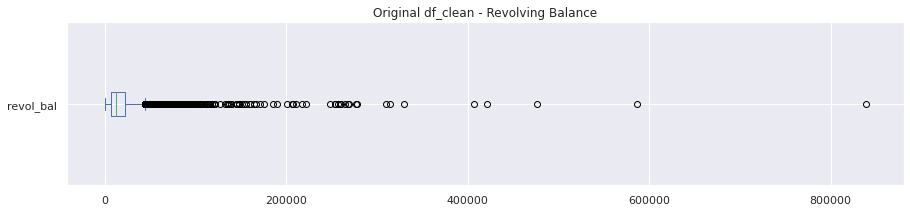

The dataset has (7148, 12) columns
455 Entries above Upper Fence
6 Entries with 0
The Entries above Upper Fence represent 6.37% of df_clean
The Entries with 0 represent 0.08% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.revol_bal.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Revolving Balance')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.revol_bal > 44152.75])))
print('{} Entries with 0'.format(len(df_clean[df_clean.revol_bal == 0])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.revol_bal > 44152.75]) / df_clean.shape[0])*100))
print('The Entries with 0 represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.revol_bal == 0]) / df_clean.shape[0])*100))


*   Avaiable Revolving Credit



In [ ]:
# working with the variable revol_util
q1_revol_util = df_clean.revol_util.quantile(.25)
q3_revol_util = df_clean.revol_util.quantile(.75)
IQR_revol_util = q3_revol_util - q1_revol_util
print('IQR of Avaiable Revolving Credit ', IQR_revol_util)

# setting the limits
up_revol_util = q3_revol_util + 1.5 * IQR_revol_util
low_revol_util = q1_revol_util - 1.5 * IQR_revol_util

print('Upper fence Avaiable Revolving Credit ', up_revol_util)
print('Lower fence Avaiable Revolving Credit ', low_revol_util)

IQR of Avaiable Revolving Credit  34.00000000000001
Upper fence Avaiable Revolving Credit  121.90000000000002
Lower fence Avaiable Revolving Credit  -14.100000000000016


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `revol_util`, let's discart the lower fence, but let`s evaluate the number of 0 entries and understand if this is relevant and a normal behavior of the database.

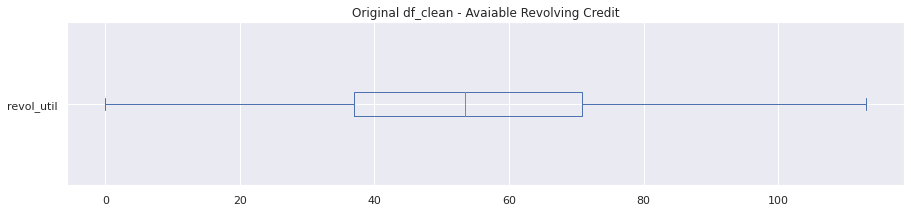

The dataset has (7148, 12) columns
0 Entries above Upper Fence
9 Entries with 0
The Entries above Upper Fence represent 0.00% of df_clean
The Entries with 0 represent 0.13% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.revol_util.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Avaiable Revolving Credit')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.revol_util > 121.90])))
print('{} Entries with 0'.format(len(df_clean[df_clean.revol_util == 0])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.revol_util > 121.90]) / df_clean.shape[0])*100))
print('The Entries with 0 represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.revol_util == 0]) / df_clean.shape[0])*100))



*   Total Accounts



In [ ]:
# working with the variable total_acc
q1_total_acc = df_clean.total_acc.quantile(.25)
q3_total_acc = df_clean.total_acc.quantile(.75)
IQR_total_acc = q3_total_acc - q1_total_acc
print('IQR of Total Accounts ', IQR_total_acc)

# setting the limits
up_total_acc = q3_total_acc + 1.5 * IQR_total_acc
low_total_acc = q1_total_acc - 1.5 * IQR_total_acc

print('Upper fence Total Accounts ', up_total_acc)
print('Lower fence Total Accounts ', low_total_acc)

IQR of Total Accounts  16.0
Upper fence Total Accounts  57.0
Lower fence Total Accounts  -7.0


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `total_acc`, let's discart the lower fence.

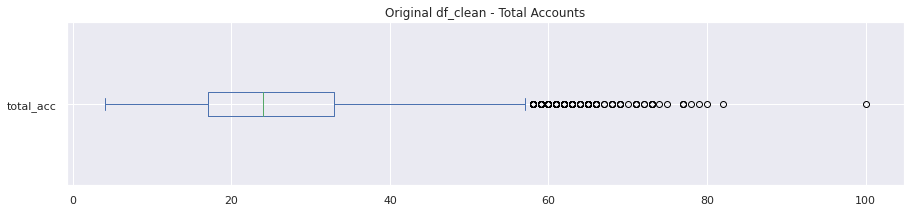

The dataset has (7148, 12) columns
146 Entries above Upper Fence
The Entries above Upper Fence represent 2.04% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.total_acc.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Total Accounts')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.total_acc > 57.0])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.total_acc > 57.0]) / df_clean.shape[0])*100))

*   Trades opened in the last 24 months	



In [ ]:
# working with the variable acc_open_past_24mths
q1_acc_open_past_24mths = df_clean.acc_open_past_24mths.quantile(.25)
q3_acc_open_past_24mths = df_clean.acc_open_past_24mths.quantile(.75)
IQR_acc_open_past_24mths = q3_acc_open_past_24mths - q1_acc_open_past_24mths
print('IQR of Trades Opened Last 24 months ', IQR_acc_open_past_24mths)

# setting the limits
up_acc_open_past_24mths = q3_acc_open_past_24mths + 1.5 * IQR_acc_open_past_24mths
low_acc_open_past_24mths = q1_acc_open_past_24mths - 1.5 * IQR_acc_open_past_24mths

print('Upper fence Trades Opened Last 24 months ', up_acc_open_past_24mths)
print('Lower fence Trades Opened Last 24 months ', low_acc_open_past_24mths)

IQR of Trades Opened Last 24 months  4.0
Upper fence Trades Opened Last 24 months  13.0
Lower fence Trades Opened Last 24 months  -3.0


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `acc_open_past_24mths`, let's discart the lower fence, but let`s evaluate the number of 0 entries and understand if this is relevant and a normal behavior of the database.

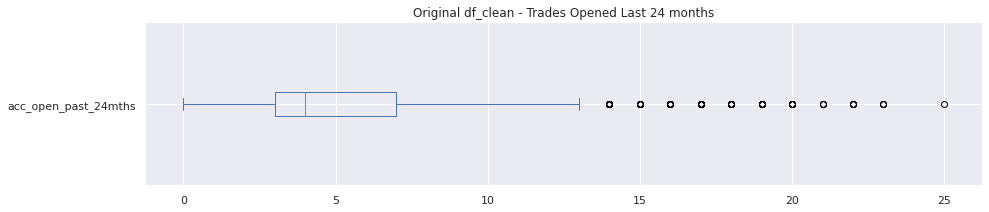

The dataset has (7148, 12) columns
127 Entries above Upper Fence
275 Entries with 0
The Entries above Upper Fence represent 1.78% of df_clean
The Entries with 0 represent 3.85% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.acc_open_past_24mths.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Trades Opened Last 24 months')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.acc_open_past_24mths > 13.0])))
print('{} Entries with 0'.format(len(df_clean[df_clean.acc_open_past_24mths == 0])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.acc_open_past_24mths > 13.0]) / df_clean.shape[0])*100))
print('The Entries with 0 represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.acc_open_past_24mths == 0]) / df_clean.shape[0])*100))



*   Total Payment






In [ ]:
# working with the variable total_pymnt
q1_total_pymnt = df_clean.total_pymnt.quantile(.25)
q3_total_pymnt = df_clean.total_pymnt.quantile(.75)
IQR_total_pymnt = q3_total_pymnt - q1_total_pymnt
print('IQR of Total Payment ', IQR_total_pymnt)

# setting the limits
up_total_pymnt = q3_total_pymnt + 1.5 * IQR_total_pymnt
low_total_pymnt = q1_total_pymnt - 1.5 * IQR_total_pymnt

print('Upper fence Total Payment ', up_total_pymnt)
print('Lower fence Total Payment ', low_total_pymnt)

IQR of Total Payment  11248.579999999998
Upper fence Total Payment  34285.07749999999
Lower fence Total Payment  -10709.242499999997


As we are working with a variable that needs to be above 1, and we saw in the description that we don't have negative or 0 values for `total_pymnt`, let's discart the lower fence, but let`s evaluate the number of 0 entries and understand if this is relevant and a normal behavior of the database.

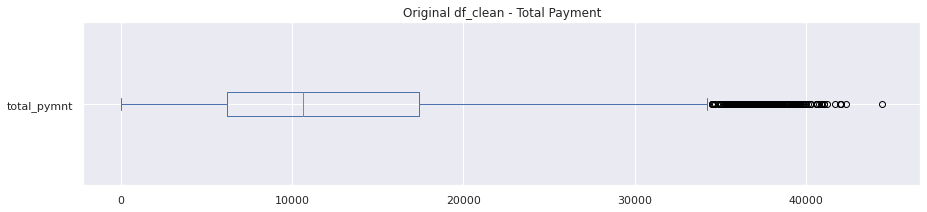

The dataset has (7148, 12) columns
233 Entries above Upper Fence
6 Entries with 0
The Entries above Upper Fence represent 3.26% of df_clean
The Entries with 0 represent 0.08% of df_clean


In [ ]:
# verifying the original dataset (df_clean)
fig, ax = plt.subplots(figsize=(15,3))
df_clean.total_pymnt.plot(kind='box', vert=False);
ax.set_title('Original df_clean - Total Payment')
plt.show()
print('The dataset has {} columns'.format(df_clean.shape))
print('{} Entries above Upper Fence'.format(len(df_clean[df_clean.total_pymnt > 34285.08])))
print('{} Entries with 0'.format(len(df_clean[df_clean.total_pymnt == 0])))
print('The Entries above Upper Fence represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.total_pymnt > 34285.08]) / df_clean.shape[0])*100))
print('The Entries with 0 represent {:.2f}% of df_clean'.format((len(df_clean [df_clean.total_pymnt == 0]) / df_clean.shape[0])*100))

### Cleaning the dataset

Before start to clean the dataset, let's talk about some rules.

I'll do a deep analyze into each variable context, but the **general rule** is that I'll consider **less than 5%** from total database entries a **non-representative** outliers that can be excluded. For cases above this value, I'll evaluate individually.

In [ ]:
## creating another the checkpoint
df_clean2 = df_clean.copy()

# cleaning the **df_clean** dataset
df_clean2.drop(df_clean2[df_clean2.installment > 1158.31].index, axis = 0, inplace = True)
df_clean2.drop(df_clean2[df_clean2.int_rate > 19.89].index, axis = 0, inplace = True)
df_clean2.drop(df_clean2[df_clean2.annual_inc > 165000].index, axis = 0, inplace = True)
df_clean2.drop(df_clean2[df_clean2.total_acc > 57.0].index, axis = 0, inplace = True)
df_clean2.drop(df_clean2[df_clean2.acc_open_past_24mths > 13.0].index, axis = 0, inplace = True)
df_clean2.drop(df_clean2[df_clean2.total_pymnt == 0].index, axis = 0, inplace = True)
df_clean2.drop(df_clean2[df_clean2.revol_util == 0].index, axis = 0, inplace = True)

print('Shape before cleaning oultliers: ', df_clean.shape)
print('Shape after cleaning outliers: ', df_clean2.shape)

# identifying the difference between the raw data and the cleaning data
print('Entries Original Dataset:\t {}'.format(df.shape[0]))
print('Entries Clean Dataset:\t {}'.format(df_clean2.shape[0]))
print('Entries represents {:.2f}% of original dataset'.format((df_clean2.shape[0] / df.shape[0])*100))

Shape before cleaning oultliers:  (7148, 12)
Shape after cleaning outliers:  (6478, 12)
Entries Original Dataset:	 7151
Entries Clean Dataset:	 6478
Entries represents 90.59% of original dataset


### **Lets evaluate the changes in the main dataset after the cleaning**

To identify the distribution of variables, I will plot the histogram.

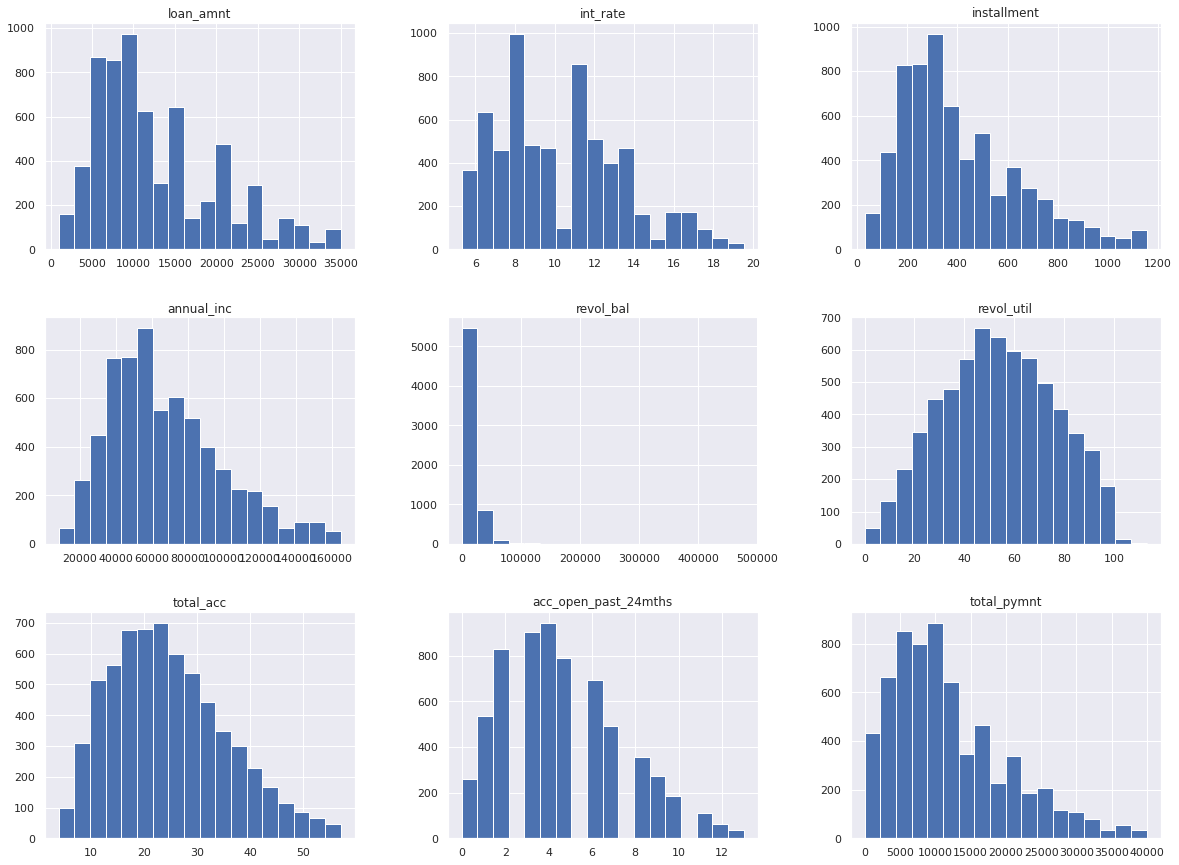

In [ ]:
# plotting the histogram
df_clean2[['loan_amnt','int_rate','installment','annual_inc','revol_bal','revol_util','total_acc','acc_open_past_24mths','total_pymnt']].hist(bins=18, figsize=(20,15));

Ok. Now, let's analyze `total_pymnt`, `acc_open_past_24mths` and `revol_bal` again

In [ ]:
print('{} Total Payment Entries above Upper Fence'.format(len(df_clean2[df_clean2.total_pymnt > 34285.08])))
print('{} Total Payment Entries with 0'.format(len(df_clean2[df_clean2.total_pymnt == 0])))
print('The Total Payment Entries above Upper Fence represent {:.2f}% of df_clean2'.format((len(df_clean2 [df_clean2.total_pymnt > 34285.08]) / df_clean2.shape[0])*100))
print('The Total Payment Entries with 0 represent {:.2f}% of df_clean2'.format((len(df_clean2 [df_clean2.total_pymnt == 0]) / df_clean2.shape[0])*100))

print('{} Trades Opened Last 24 months Entries above Upper Fence'.format(len(df_clean2[df_clean2.acc_open_past_24mths > 13.0])))
print('{} Trades Opened Last 24 months Entries with 0'.format(len(df_clean2[df_clean2.acc_open_past_24mths == 0])))
print('The Trades Opened Last 24 months Entries above Upper Fence represent {:.2f}% of df_clean2'.format((len(df_clean2 [df_clean2.acc_open_past_24mths > 13.0]) / df_clean2.shape[0])*100))
print('The Trades Opened Last 24 months Entries with 0 represent {:.2f}% of df_clean2'.format((len(df_clean2 [df_clean2.acc_open_past_24mths == 0]) / df_clean2.shape[0])*100))

print('{} Revolving Balance Entries above Upper Fence'.format(len(df_clean2[df_clean2.revol_bal > 44152.75])))
print('{} Revolving Balance Entries with 0'.format(len(df_clean2[df_clean2.revol_bal == 0])))
print('The Revolving Balance Entries above Upper Fence represent {:.2f}% of df_clean2'.format((len(df_clean2 [df_clean2.revol_bal > 44152.75]) / df_clean2.shape[0])*100))
print('The Revolving Balance Entries with 0 represent {:.2f}% of df_clean2'.format((len(df_clean2 [df_clean2.revol_bal == 0]) / df_clean2.shape[0])*100))

102 Total Payment Entries above Upper Fence
0 Total Payment Entries with 0
The Total Payment Entries above Upper Fence represent 1.57% of df_clean2
The Total Payment Entries with 0 represent 0.00% of df_clean2
0 Trades Opened Last 24 months Entries above Upper Fence
260 Trades Opened Last 24 months Entries with 0
The Trades Opened Last 24 months Entries above Upper Fence represent 0.00% of df_clean2
The Trades Opened Last 24 months Entries with 0 represent 4.01% of df_clean2
293 Revolving Balance Entries above Upper Fence
0 Revolving Balance Entries with 0
The Revolving Balance Entries above Upper Fence represent 4.52% of df_clean2
The Revolving Balance Entries with 0 represent 0.00% of df_clean2


I'll work with those variables even with outliers. We can analyze the prediction results after and maybe if the results are bad we can perform more cleaning. We already cleaned 10% of our dataset. There some entries as Revolving Balance and Trades Opened that doesn't seems to have strong relationships with loan status, so let's keep them and keep in mind that maybe we will need to clean them after the classification's results.

In [ ]:
df_clean2.head()

,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
1,Fully Paid,8000,6.68,245.85,RENT,41000.0,Not Verified,24377,51.0,29,2,8351.630000
2,Fully Paid,12175,9.17,388.13,MORTGAGE,100000.0,Not Verified,21329,64.6,17,3,13205.910000
3,Charged Off,6400,6.92,197.38,RENT,41900.0,Source Verified,14936,73.2,15,1,3550.380000
4,Fully Paid,12600,6.68,387.22,OWN,73800.0,Not Verified,9904,20.7,25,4,13125.770000
5,Fully Paid,9000,8.67,284.82,MORTGAGE,82000.0,Verified,46158,77.1,29,2,9789.870001


Now, let's see our distribution again.

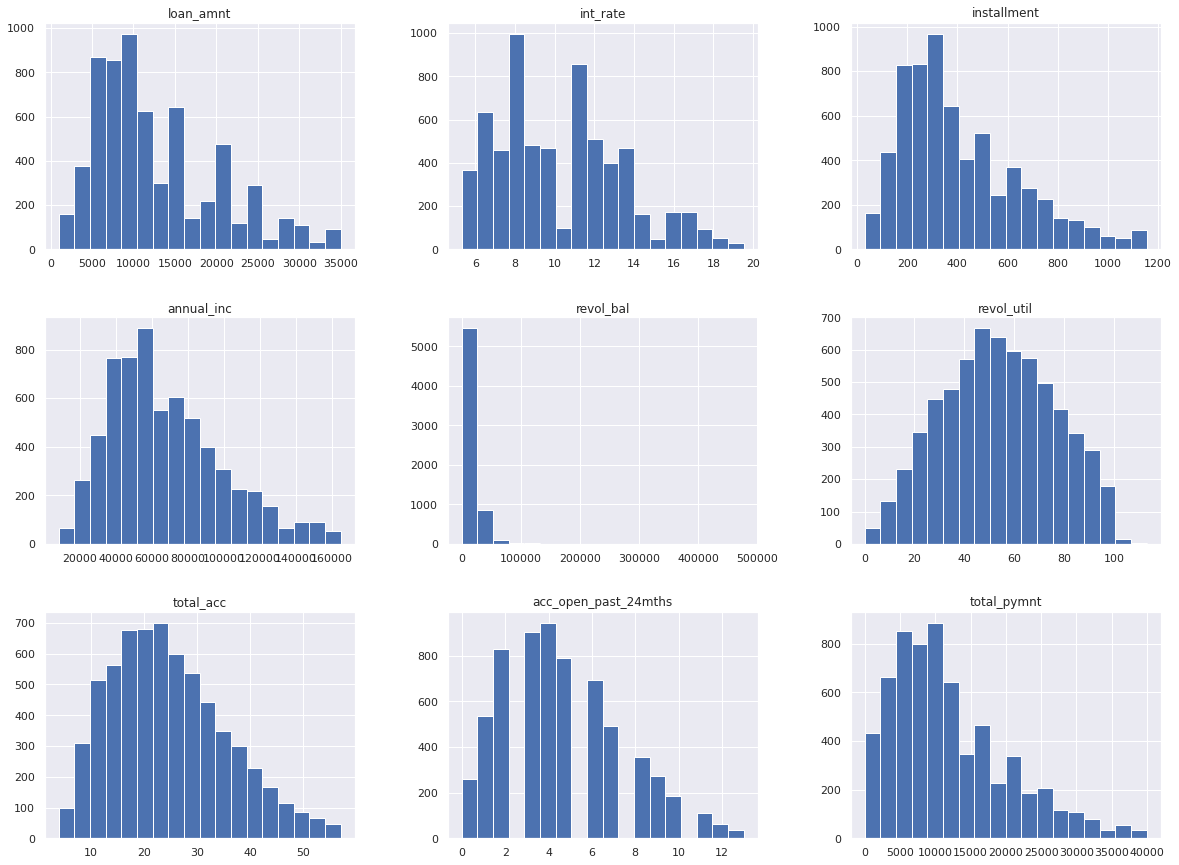

In [ ]:
# plotting the histogram
df_clean2[['loan_amnt','int_rate','installment','annual_inc','revol_bal','revol_util','total_acc','acc_open_past_24mths','total_pymnt']].hist(bins=18, figsize=(20,15));

Lets take another look on our new correlation of variables too.

In [ ]:
# creating the correlation matrix
corr2 = df_clean2[['loan_amnt','int_rate','installment','annual_inc','revol_bal','revol_util','total_acc','acc_open_past_24mths','total_pymnt']].corr()

display(corr2);

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt
loan_amnt,1.000000,-0.093908,0.995725,0.514791,0.412935,0.161245,0.184094,-0.047354,0.859836
int_rate,-0.093908,1.000000,-0.013846,-0.286850,-0.080787,0.259302,-0.164730,0.220643,-0.168252
installment,0.995725,-0.013846,1.000000,0.493375,0.405904,0.182640,0.173287,-0.029303,0.846335
annual_inc,0.514791,-0.286850,0.493375,1.000000,0.355759,0.093054,0.265102,0.047072,0.493299
revol_bal,0.412935,-0.080787,0.405904,0.355759,1.000000,0.224536,0.188463,-0.041256,0.357779
revol_util,0.161245,0.259302,0.182640,0.093054,0.224536,1.000000,-0.137748,-0.233239,0.106569
total_acc,0.184094,-0.164730,0.173287,0.265102,0.188463,-0.137748,1.000000,0.375327,0.173456
acc_open_past_24mths,-0.047354,0.220643,-0.029303,0.047072,-0.041256,-0.233239,0.375327,1.000000,-0.073092
total_pymnt,0.859836,-0.168252,0.846335,0.493299,0.357779,0.106569,0.173456,-0.073092,1.000000


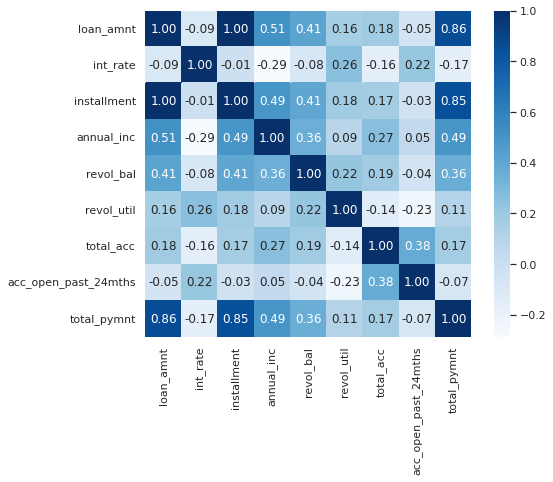

In [ ]:
# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr2, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

### **Categorical variables and Dummy variables**

In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

A dummy variable is a binary variable that takes a value of 0 or 1. One adds such variables to a regression model to represent factors which are of a binary nature i.e. they are either observed or not observed. Within this broad definition lie several interesting use cases.

`loan_status`, `home_ownership`, and `verification_status` are categorical variables so let's work with them.


In [ ]:
#get dummy for categorical features
df_dummies = pd.get_dummies(df_clean2)
#drop all dummy-variables which contain not at least 1% ones
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)]
df_dummies.drop(drop_columns, axis=1, inplace=True)

df_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_Charged Off,loan_status_Fully Paid,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1,8000,6.68,245.85,41000.0,24377,51.0,29,2,8351.630000,0,1,0,0,1,1,0,0
2,12175,9.17,388.13,100000.0,21329,64.6,17,3,13205.910000,0,1,1,0,0,1,0,0
3,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.380000,1,0,0,0,1,0,1,0
4,12600,6.68,387.22,73800.0,9904,20.7,25,4,13125.770000,0,1,0,1,0,1,0,0
5,9000,8.67,284.82,82000.0,46158,77.1,29,2,9789.870001,0,1,1,0,0,0,0,1


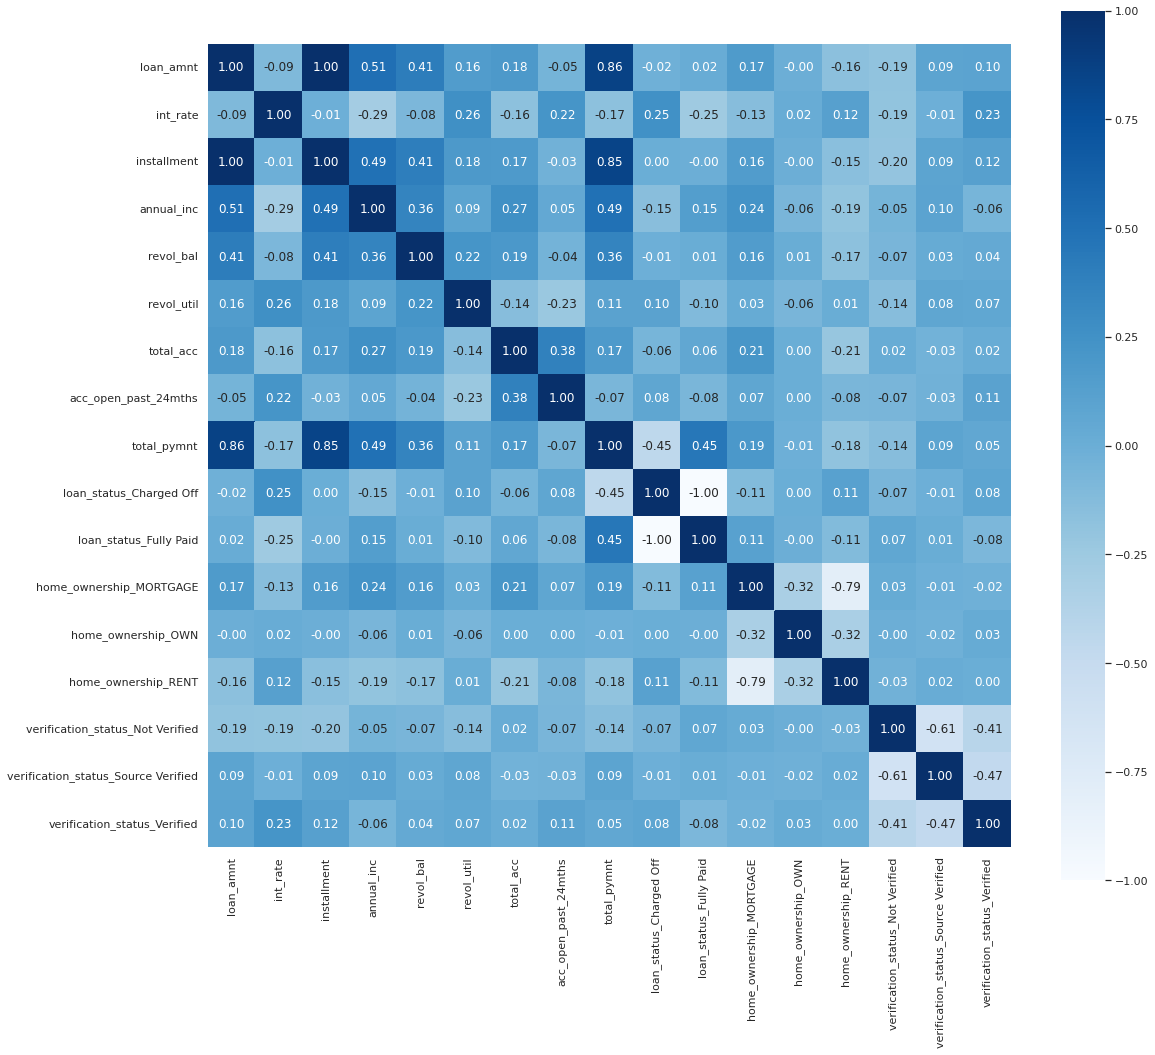

In [ ]:
# creating the correlation matrix
corr_dummies = df_dummies.corr()

# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(18,16)})
sns.heatmap(corr_dummies, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

### **Hard stop here**

In the begining of this study, exploring data, I created a variable called `loan_status_bin`. For academic purposes I dropped this variable in order to get all 3 dummy variables: `loan_status`, `home_ownership`, and `verification_status`

But, the goal of this study is to analyze Charged Off and Fully Paid loans, so I will go back a little bit and re-create my df_dummies, but instead of transform `loan_status` in a dummy variable, I'll re-create `loan_status_bin`, so only `home_ownership`, and `verification_status` will be transformed into dummies.

In [ ]:
#transform the loan_status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df_clean2['loan_status_bin'] = df_clean2['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

df_clean2.head()

,loan_status,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin
1,Fully Paid,8000,6.68,245.85,RENT,41000.0,Not Verified,24377,51.0,29,2,8351.630000,0
2,Fully Paid,12175,9.17,388.13,MORTGAGE,100000.0,Not Verified,21329,64.6,17,3,13205.910000,0
3,Charged Off,6400,6.92,197.38,RENT,41900.0,Source Verified,14936,73.2,15,1,3550.380000,1
4,Fully Paid,12600,6.68,387.22,OWN,73800.0,Not Verified,9904,20.7,25,4,13125.770000,0
5,Fully Paid,9000,8.67,284.82,MORTGAGE,82000.0,Verified,46158,77.1,29,2,9789.870001,0


In [ ]:
#dropping loan_status
df_clean2.drop(columns=['loan_status'], inplace=True)

df_clean2.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin
1,8000,6.68,245.85,RENT,41000.0,Not Verified,24377,51.0,29,2,8351.630000,0
2,12175,9.17,388.13,MORTGAGE,100000.0,Not Verified,21329,64.6,17,3,13205.910000,0
3,6400,6.92,197.38,RENT,41900.0,Source Verified,14936,73.2,15,1,3550.380000,1
4,12600,6.68,387.22,OWN,73800.0,Not Verified,9904,20.7,25,4,13125.770000,0
5,9000,8.67,284.82,MORTGAGE,82000.0,Verified,46158,77.1,29,2,9789.870001,0


In [ ]:
#get dummy for categorical features
df_dummies = pd.get_dummies(df_clean2)
#drop all dummy-variables which contain not at least 1% ones
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)]
df_dummies.drop(drop_columns, axis=1, inplace=True)

df_dummies.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1,8000,6.68,245.85,41000.0,24377,51.0,29,2,8351.630000,0,0,0,1,1,0,0
2,12175,9.17,388.13,100000.0,21329,64.6,17,3,13205.910000,0,1,0,0,1,0,0
3,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.380000,1,0,0,1,0,1,0
4,12600,6.68,387.22,73800.0,9904,20.7,25,4,13125.770000,0,0,1,0,1,0,0
5,9000,8.67,284.82,82000.0,46158,77.1,29,2,9789.870001,0,1,0,0,0,0,1


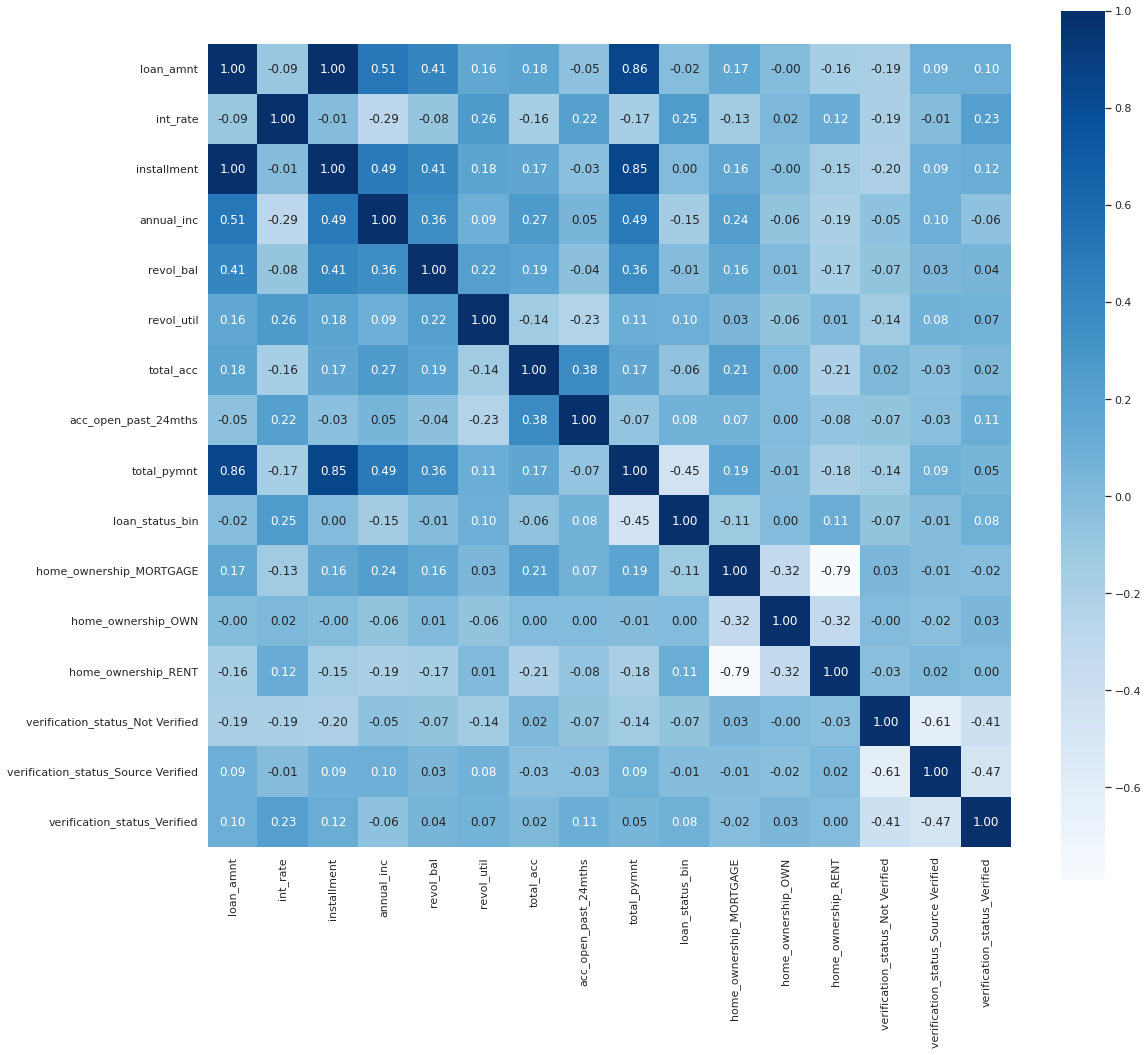

In [ ]:
# creating the correlation matrix
corr_dummies = df_dummies.corr()

# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(18,16)})
sns.heatmap(corr_dummies, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

### What's the relationship between Interest Rate and Annual Income?

Now that the dataset is prepared, let`s do create some data visualizations in order to analyze our data.

In [ ]:
#creating a log feature for annual inc
df_dummies['annual_inc_log'] = df_dummies['annual_inc'].apply(np.log)

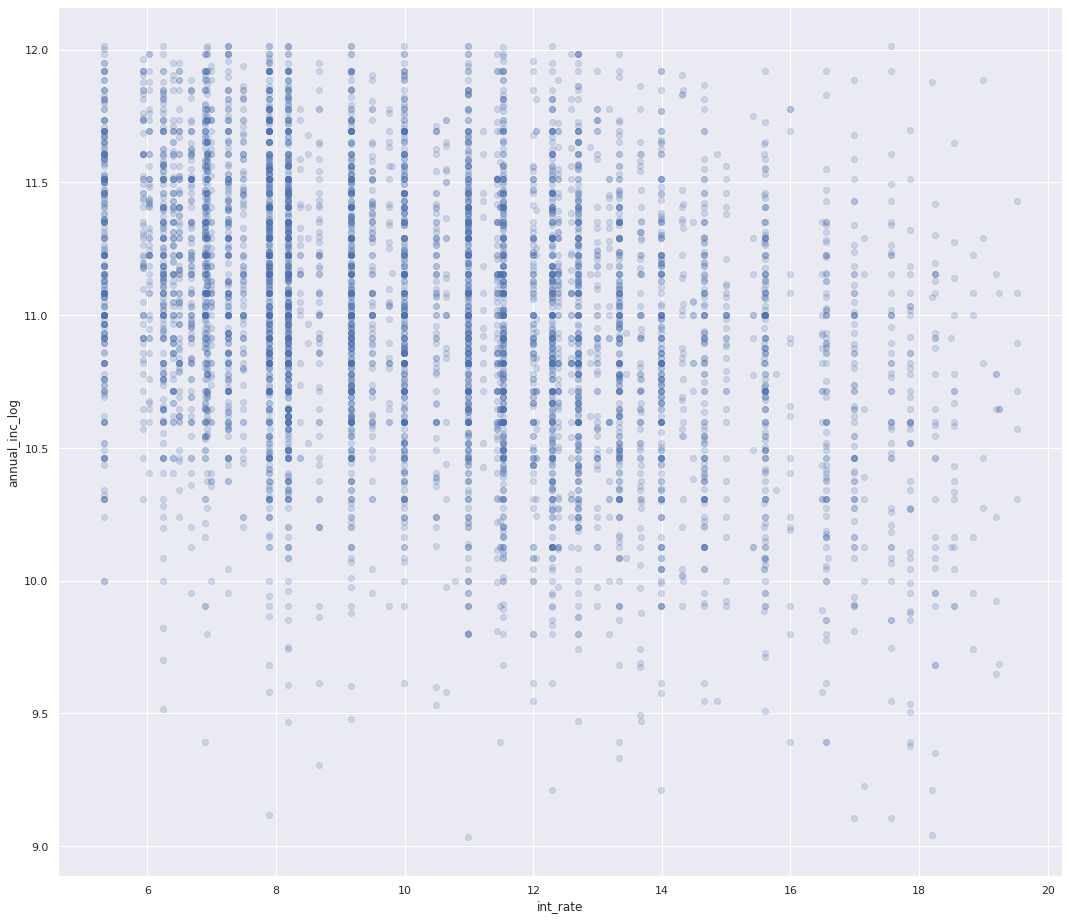

In [ ]:
# Relationship Between Rate and Annual Income
sns.regplot(x = "int_rate", y="annual_inc_log", data=df_dummies, fit_reg = False, scatter_kws={"alpha": 0.2})

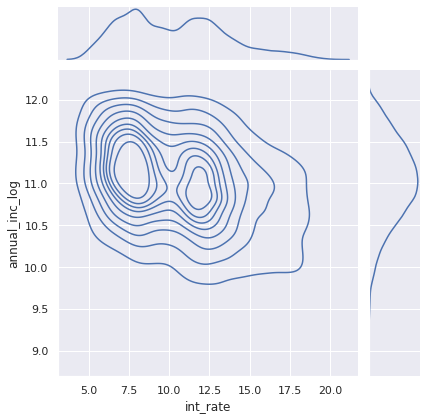

In [ ]:
sns.jointplot(x = "int_rate", y="annual_inc_log", data=df_dummies, kind = 'kde')

Ok, we can see that the relationship between annual income and interest rate is weak, but there's a little indicative that bigger the annual income, lower the interest rate.

We already worked on another charts before, seeing normal distribution trhough histograms, and some visualizations.

As we finished the data exploration, let's start to work on our predictions.

In order to have another file, I'll export our results in a new file and re-import.

For academic purposes I'll delete the variable: `annual_inc_log`

In [ ]:
#creating the new dataframe
df_predictions = df_dummies.copy()

#dropping total payment and annual income (log)
df_predictions.drop(columns=['annual_inc_log'], inplace=True)

df_predictions.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
1,8000,6.68,245.85,41000.0,24377,51.0,29,2,8351.630000,0,0,0,1,1,0,0
2,12175,9.17,388.13,100000.0,21329,64.6,17,3,13205.910000,0,1,0,0,1,0,0
3,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.380000,1,0,0,1,0,1,0
4,12600,6.68,387.22,73800.0,9904,20.7,25,4,13125.770000,0,0,1,0,1,0,0
5,9000,8.67,284.82,82000.0,46158,77.1,29,2,9789.870001,0,1,0,0,0,0,1


In [ ]:
df_predictions.to_csv(r'df_predictions.csv', index = False)

##**Predictive Analytics Tasks**

In [ ]:
# importing the libraries (againg, just because this file is getting bigger and although I won't use the previous dataframes anymore, I dont't want to split the analyzis)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('df_predictions.csv')
df.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,8000,6.68,245.85,41000.0,24377,51.0,29,2,8351.630000,0,0,0,1,1,0,0
1,12175,9.17,388.13,100000.0,21329,64.6,17,3,13205.910000,0,1,0,0,1,0,0
2,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.380000,1,0,0,1,0,1,0
3,12600,6.68,387.22,73800.0,9904,20.7,25,4,13125.770000,0,0,1,0,1,0,0
4,9000,8.67,284.82,82000.0,46158,77.1,29,2,9789.870001,0,1,0,0,0,0,1


First of all, I'll exclude total_pymnt for this part as it is a requirement from the project.

In [ ]:
df.drop(columns=['total_pymnt'], inplace=True)

Lets take a look in our dataframe just to double check if everything is ok to start.

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
count,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000
mean,12731.973603,10.325354,412.004171,67936.910935,16773.124421,53.752454,24.563754,4.607595,0.166255,0.441494,0.116240,0.442266,0.348873,0.411392,0.239734
std,7360.278993,3.177155,237.972399,31687.298076,19155.101645,22.561542,11.101586,2.788586,0.372338,0.496604,0.320537,0.496694,0.476651,0.492124,0.426954
min,1000.000000,5.320000,30.850000,8391.480000,15.000000,0.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7200.000000,7.890000,234.417500,45000.000000,7108.000000,37.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10412.500000,9.990000,344.950000,61640.000000,12142.000000,53.400000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17000.000000,12.390000,546.770000,86000.000000,20360.000000,70.700000,32.000000,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,35000.000000,19.520000,1154.660000,165000.000000,476869.000000,113.100000,57.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

loan_amnt                              0.0
int_rate                               0.0
installment                            0.0
annual_inc                             0.0
revol_bal                              0.0
revol_util                             0.0
total_acc                              0.0
acc_open_past_24mths                   0.0
loan_status_bin                        0.0
home_ownership_MORTGAGE                0.0
home_ownership_OWN                     0.0
home_ownership_RENT                    0.0
verification_status_Not Verified       0.0
verification_status_Source Verified    0.0
verification_status_Verified           0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            6478 non-null   int64  
 1   int_rate                             6478 non-null   float64
 2   installment                          6478 non-null   float64
 3   annual_inc                           6478 non-null   float64
 4   revol_bal                            6478 non-null   int64  
 5   revol_util                           6478 non-null   float64
 6   total_acc                            6478 non-null   int64  
 7   acc_open_past_24mths                 6478 non-null   int64  
 8   loan_status_bin                      6478 non-null   int64  
 9   home_ownership_MORTGAGE              6478 non-null   int64  
 10  home_ownership_OWN                   6478 non-null   int64  
 11  home_ownership_RENT           

**Ok, all setup, let's go!**

The classification goal is to predict whether the loan applicant will default (1/0) on a new debt (variable y).

The dataset provides loan applicants’ information. It includes 6.477 records and 15 fields.

In [ ]:
df['loan_status_bin'].value_counts()

0    5401
1    1077
Name: loan_status_bin, dtype: int64

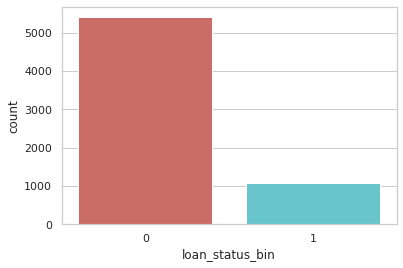

In [ ]:
sns.countplot(x='loan_status_bin', data=df, palette='hls')
plt.show()

In [ ]:
count_no_default = len(df[df['loan_status_bin']==0])
count_default = len(df[df['loan_status_bin']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print('\033[1m percentage of no default is', pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print('\033[1m percentage of default', pct_of_default*100)

 percentage of no default is 83.37449830194504
 percentage of default 16.625501698054958


Our classes are imbalanced, and the ratio of no-default to default instances is 83:17. Let's work with this unbalanced data, and after all the studies, I`ll apply some techniques to balance the dataset and we will see the difference in the results.

In [ ]:
df.groupby('loan_status_bin').mean()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
loan_status_bin,,,,,,,,,,,,,,
0,12792.927236,9.968078,411.788954,70000.146471,16879.331605,52.725440,24.846325,4.513794,0.466765,0.115719,0.417515,0.363081,0.413257,0.223662
1,12426.299907,12.117038,413.083454,57590.081662,16240.510678,58.902786,23.146704,5.077994,0.314763,0.118849,0.566388,0.277623,0.402043,0.320334


**Observations**




*   Loan amount does't have impact on the default or no default
*   The interest rate and installment are has a higher average for default loans.
* The annual income is lower for the default loans
* Applicants who also pays rent have defaulted more.

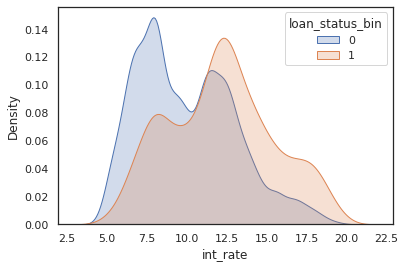

In [ ]:
sns.set(style='white')
sns.kdeplot( df['int_rate'].loc[df['loan_status_bin'] == 0], hue=df['loan_status_bin'], shade=True)
sns.kdeplot( df['int_rate'].loc[df['loan_status_bin'] == 1], hue=df['loan_status_bin'], shade=True)

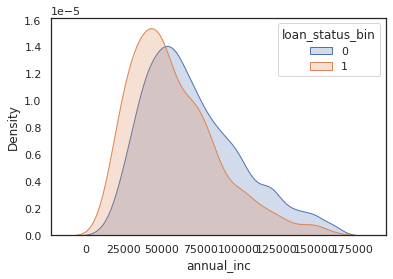

In [ ]:
sns.set(style='white')
sns.kdeplot( df['annual_inc'].loc[df['loan_status_bin'] == 0], hue=df['loan_status_bin'], shade=True)
sns.kdeplot( df['annual_inc'].loc[df['loan_status_bin'] == 1], hue=df['loan_status_bin'], shade=True)

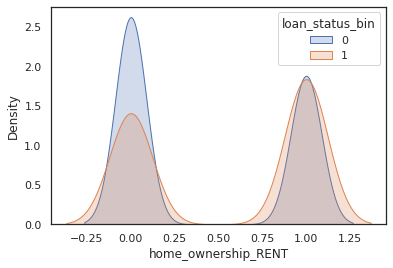

In [ ]:
sns.set(style='white')
sns.kdeplot( df['home_ownership_RENT'].loc[df['loan_status_bin'] == 0], hue=df['loan_status_bin'], shade=True)
sns.kdeplot( df['home_ownership_RENT'].loc[df['loan_status_bin'] == 1], hue=df['loan_status_bin'], shade=True)

## Feature Scaling

Feature scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled.

Tree-based algorithms are fairly insensitive to the scale of the features. Also, feature scaling helps machine learning, and deep learning algorithms train and converge faster.

There are some feature scaling techniques such as Normalization and Standardization that are the most popular and at the same time, the most confusing ones.


Normalization or Min-Max Scaling is used to transform features to be on a similar scale.This scales the range to [0, 1] or sometimes [-1, 1]. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with them. Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.

Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.

Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.

Standardization does not get affected by outliers because there is no predefined range of transformed features.

In [ ]:
df_standard = df.copy()

In [ ]:
#splitting the independent and dependent variables
X = df.loc[:, df.columns != 'loan_status_bin']
y = df.loc[:, df.columns == 'loan_status_bin']

In [ ]:
#splitting the independent and dependent variables
X_std = df_standard.loc[:, df_standard.columns != 'loan_status_bin']
y_std = df_standard.loc[:, df_standard.columns == 'loan_status_bin']

In [ ]:
#creating the training and validation set using 60:40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [ ]:
#creating the training and validation set using 60:40
from sklearn.model_selection import train_test_split
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.6, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_std_train = sc.fit_transform(X_std_train)
X_std_test = sc.transform(X_std_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.405760
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.098      
Dependent Variable:        loan_status_bin       AIC:                   5283.0256  
Date:                      2022-08-16 20:04      BIC:                   5371.1157  
No. Observations:          6478                  Log-Likelihood:        -2628.5    
Df Model:                  12                    LL-Null:               -2914.4    
Df Residuals:              6465                  LLR p-value:           1.0795e-114
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            6.0000                                                  
-----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_std,X_std)
result_std=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.405760
         Iterations 6
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.098      
Dependent Variable:        loan_status_bin       AIC:                   5283.0256  
Date:                      2022-08-16 20:04      BIC:                   5371.1157  
No. Observations:          6478                  Log-Likelihood:        -2628.5    
Df Model:                  12                    LL-Null:               -2914.4    
Df Residuals:              6465                  LLR p-value:           1.0795e-114
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            6.0000                                                  
-----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------

In [ ]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
loan_amnt,5.575002e-01
int_rate,9.980460e-08
installment,4.024392e-01
annual_inc,1.087180e-16
revol_bal,4.192754e-02
revol_util,2.272165e-09
total_acc,5.765567e-01
acc_open_past_24mths,2.192525e-08
home_ownership_MORTGAGE,NaN
home_ownership_OWN,NaN


In [ ]:
pvalue_std = pd.DataFrame(result_std.pvalues,columns={'p_value_std'},)
pvalue_std

,p_value_std
loan_amnt,5.575002e-01
int_rate,9.980460e-08
installment,4.024392e-01
annual_inc,1.087180e-16
revol_bal,4.192754e-02
revol_util,2.272165e-09
total_acc,5.765567e-01
acc_open_past_24mths,2.192525e-08
home_ownership_MORTGAGE,NaN
home_ownership_OWN,NaN


In [ ]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs 
print(pvs)
print(len(pvs))

['int_rate', 'annual_inc', 'revol_bal', 'revol_util', 'acc_open_past_24mths']
5


In [ ]:
pvs=[]
for i in range (0, len(pvalue_std["p_value_std"])):
    if pvalue_std["p_value_std"][i] < 0.05:
        pvs.append(pvalue_std.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs 
print(pvs)
print(len(pvs))

['int_rate', 'annual_inc', 'revol_bal', 'revol_util', 'acc_open_past_24mths']
5


##**Logistic Regression Model Fitting**

In [ ]:
from sklearn import metrics
X = df.loc[:, df.columns != 'loan_status_bin']
y = df.loc[:, df.columns == 'loan_status_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
X_std = df_standard.loc[:, df_standard.columns != 'loan_status_bin']
y_std = df_standard.loc[:, df_standard.columns == 'loan_status_bin']

from sklearn.model_selection import train_test_split
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.6, random_state=42)

sc = StandardScaler()

X_std_train = sc.fit_transform(X_std_train)
X_std_test = sc.transform(X_std_test)


log_regression_log = LogisticRegression()
log_regression_log.fit(X_std_train, y_std_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = log_regression.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.84


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_std = log_regression_log.predict(X_std_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_std_test, y_pred_std)))

Accuracy of logistic regression classifier on test set: 0.84


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

def make_confusion_matrix(cm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE

  blanks = ['' for i in range(cm.size)]

  if group_names and len(group_names)==cm.size:
      group_labels = ['{}\n'.format(value) for value in group_names]
  else:
        group_labels = blanks

  if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cm.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  else:
        group_percentages = blanks

  box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS

  if sum_stats:
      #Accuracy is sum of diagonal divided by total observations
      accuracy  = np.trace(cm) / float(np.sum(cm))

      #if it is a binary confusion matrix, show some more stats
      if len(cm)==2:
          #Metrics for Binary Confusion Matrices
          precision = cm[1,1] / sum(cm[:,1])
          recall    = cm[1,1] / sum(cm[1,:])
          f1_score  = 2*precision*recall / (precision + recall)
          stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
              accuracy,precision,recall,f1_score)
      else:
          stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
  else:
        stats_text = ''

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS

  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(cm,annot=box_labels,fmt='',cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
      plt.ylabel('True label')
      plt.xlabel('Predicted label' + stats_text)
  else:
      plt.xlabel(stats_text)
    
  if title:
      plt.title(title)

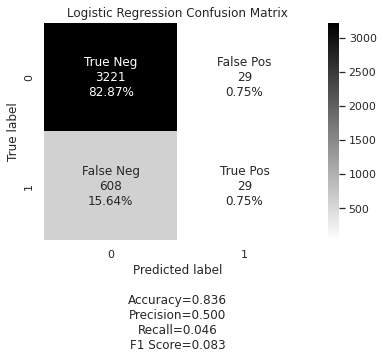

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Logistic Regression Confusion Matrix')

In [ ]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  3250 correct predictions
 The result is telling us that we have:  637 incorrect predictions
 We have a total predictions of:  3887


In [ ]:
y_pred_std = np.where(y_pred_std > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_std_test, y_pred_std)

def make_confusion_matrix(cm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE

  blanks = ['' for i in range(cm.size)]

  if group_names and len(group_names)==cm.size:
      group_labels = ['{}\n'.format(value) for value in group_names]
  else:
        group_labels = blanks

  if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cm.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  else:
        group_percentages = blanks

  box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS

  if sum_stats:
      #Accuracy is sum of diagonal divided by total observations
      accuracy  = np.trace(cm) / float(np.sum(cm))

      #if it is a binary confusion matrix, show some more stats
      if len(cm)==2:
          #Metrics for Binary Confusion Matrices
          precision = cm[1,1] / sum(cm[:,1])
          recall    = cm[1,1] / sum(cm[1,:])
          f1_score  = 2*precision*recall / (precision + recall)
          stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
              accuracy,precision,recall,f1_score)
      else:
          stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
  else:
        stats_text = ''

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS

  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(cm,annot=box_labels,fmt='',cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
      plt.ylabel('True label')
      plt.xlabel('Predicted label' + stats_text)
  else:
      plt.xlabel(stats_text)
    
  if title:
      plt.title(title)

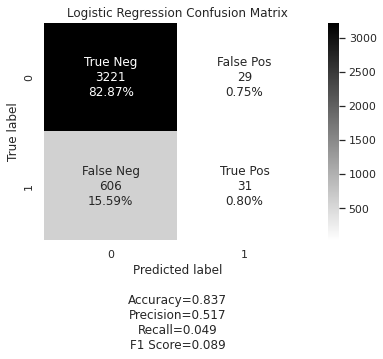

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Logistic Regression Confusion Matrix')

In [ ]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  3252 correct predictions
 The result is telling us that we have:  635 incorrect predictions
 We have a total predictions of:  3887


To quote from Scikit Learn:<p>
The **precision** is intuitively the ability of the classifier to not label a sample as positive if it is negative.<p>
The **recall** is intuitively the ability of the classifier to find all the positive samples.<p>
The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The **F-beta** score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.<p>
The **support** is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3250
           1       0.50      0.05      0.08       637

    accuracy                           0.84      3887
   macro avg       0.67      0.52      0.50      3887
weighted avg       0.79      0.84      0.77      3887



The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, **50% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.** <p>
The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify **5% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_std_test, y_pred_std))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3250
           1       0.52      0.05      0.09       637

    accuracy                           0.84      3887
   macro avg       0.68      0.52      0.50      3887
weighted avg       0.79      0.84      0.78      3887



The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, **52% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.** <p>
The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify **5% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.**

####**Interpretations**

The **receiver operating characteristic** (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

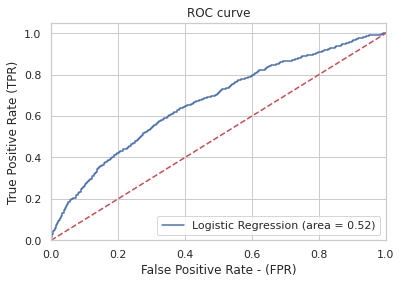

ROC-AUC-score:  0.5183014128728414


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, log_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC-score: ', roc_auc_score(y_test, y_pred))

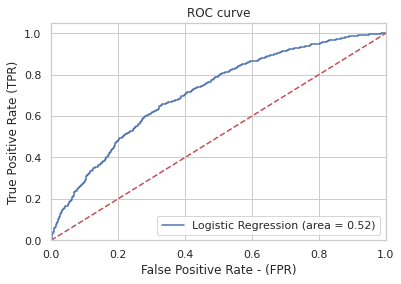

ROC-AUC-score:  0.5198712715855572


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_std_test, log_regression_log.predict(X_std_test))
fpr, tpr, thresholds = roc_curve(y_std_test, log_regression_log.predict_proba(X_std_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC-score: ', roc_auc_score(y_std_test, y_pred_std))

**As the results with the standardzation applied were better, I will use standardization in the next models**.

##**Over-sampling using SMOTE**

Within statistics, Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). These terms are used both in statistical sampling, survey design methodology and in machine learning.

Both oversampling and undersampling involve introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken. **Data Imbalance** can be of the following types:


*   Under-representation of a class in one or more important predictor variables
*   **Under-representation of one class in the outcome (dependent) variable**

There are a number of methods available to oversample a dataset used in a typical classification problem. **The most common technique is known as SMOTE**: Synthetic Minority Over-sampling Technique.

To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

I'll up-sample the default on our training data, using the SMOTE algorithm.



## Splitting the dataset into the Training set and Test set

In [ ]:
#splitting the independent and dependent variables
X = df_standard.loc[:, df_standard.columns != 'loan_status_bin']
y = df_standard.loc[:, df_standard.columns == 'loan_status_bin']

In [ ]:
#creating the training and validation set using 60:40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
columns = X_train.columns

In [ ]:
#oversampling using SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)

os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['loan_status_bin'])

# we can Check the numbers of our data
print('\033[1m length of oversampled data is ',len(os_data_X))
print('\033[1m Number of no default in oversampled data ',len(os_data_y[os_data_y['loan_status_bin']==0]))
print('\033[1m Number of default ',len(os_data_y[os_data_y['loan_status_bin']==1]))
print('\033[1m Proportion of no default data in oversampled data is ',len(os_data_y[os_data_y['loan_status_bin']==0])/len(os_data_X))
print('\033[1m Proportion of default data in oversampled data is ',len(os_data_y[os_data_y['loan_status_bin']==1])/len(os_data_X))

 length of oversampled data is  4302
 Number of no default in oversampled data  2151
 Number of default  2151
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


Now we have a perfect balanced data! I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations.

**Recursive Feature Elimination**

The objective of using this technique is to select only the features with trully importance for our model. 

from sklearn:
<p>"Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached."

In [ ]:
df_vars=df_standard.columns.values.tolist()
y=['loan_status_bin']
X=[i for i in df_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()

rfe = RFE(estimator=log_regression, n_features_to_select=7, step=1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False False  True  True  True  True
  True  True]
[6 1 5 7 8 2 4 3 1 1 1 1 1 1]


In [ ]:
os_data_X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_bal',
       'revol_util', 'total_acc', 'acc_open_past_24mths',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [ ]:
data_X1 = pd.DataFrame({
    'Feature': os_data_X.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
1,int_rate,1
8,home_ownership_MORTGAGE,1
9,home_ownership_OWN,1
10,home_ownership_RENT,1
11,verification_status_Not Verified,1
12,verification_status_Source Verified,1
13,verification_status_Verified,1
5,revol_util,2
7,acc_open_past_24mths,3
6,total_acc,4


In [ ]:
X=os_data_X
y=os_data_y['loan_status_bin']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.358318
         Iterations 8
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.483    
Dependent Variable:         loan_status_bin        AIC:                    3110.9645
Date:                       2022-08-16 20:12       BIC:                    3200.1002
No. Observations:           4302                   Log-Likelihood:         -1541.5  
Df Model:                   13                     LL-Null:                -2981.9  
Df Residuals:               4288                   LLR p-value:            0.0000   
Converged:                  1.0000                 Scale:                  1.0000   
No. Iterations:             8.0000                                                  
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975

Almost all variables have `p value` under 0.05 which means that only `total_acc` has a confidence level lower than 95% of the prediction results. We already know that this variable has less importance than all other ones (RFE score), but we gonna keep this variable in our study for academic purposes.

In [ ]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
loan_amnt,4.086062e-23
int_rate,3.064147e-81
installment,4.125295e-22
annual_inc,1.096976e-06
revol_bal,4.009710e-01
revol_util,4.339709e-14
total_acc,5.528596e-04
acc_open_past_24mths,2.658233e-02
home_ownership_MORTGAGE,1.906906e-71
home_ownership_OWN,2.687852e-55


In [ ]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs 
print(pvs)
print(len(pvs))

['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified']
13


##**Logistic Regression Model Fitting - OS Data**

In [ ]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = log_regression.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.67


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

def make_confusion_matrix(cm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE

  blanks = ['' for i in range(cm.size)]

  if group_names and len(group_names)==cm.size:
      group_labels = ['{}\n'.format(value) for value in group_names]
  else:
        group_labels = blanks

  if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cm.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  else:
        group_percentages = blanks

  box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS

  if sum_stats:
      #Accuracy is sum of diagonal divided by total observations
      accuracy  = np.trace(cm) / float(np.sum(cm))

      #if it is a binary confusion matrix, show some more stats
      if len(cm)==2:
          #Metrics for Binary Confusion Matrices
          precision = cm[1,1] / sum(cm[:,1])
          recall    = cm[1,1] / sum(cm[1,:])
          f1_score  = 2*precision*recall / (precision + recall)
          stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
              accuracy,precision,recall,f1_score)
      else:
          stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
  else:
        stats_text = ''

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS

  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(cm,annot=box_labels,fmt='',cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
      plt.ylabel('True label')
      plt.xlabel('Predicted label' + stats_text)
  else:
      plt.xlabel(stats_text)
    
  if title:
      plt.title(title)

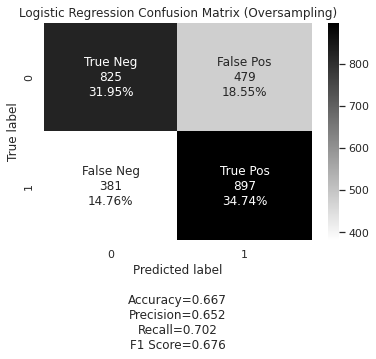

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Logistic Regression Confusion Matrix (Oversampling)')

In [ ]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  1722 correct predictions
 The result is telling us that we have:  860 incorrect predictions
 We have a total predictions of:  2582


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      1304
           1       0.65      0.70      0.68      1278

    accuracy                           0.67      2582
   macro avg       0.67      0.67      0.67      2582
weighted avg       0.67      0.67      0.67      2582



####**Interpretations**

The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, **65% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.** <p>
The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify **70% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.**

The **receiver operating characteristic** (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

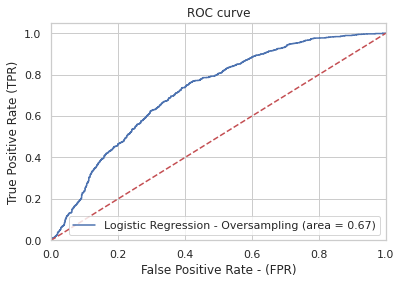

ROC-AUC-score Oversampling:  0.6672733229643711


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, log_regression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_regression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression - Oversampling (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC-score Oversampling: ', roc_auc_score(y_test, y_pred))

The results with oversampling were way better than with the unbalanced database.<p>

ROC AUC 0.67 vs 0.52<p>

The main difference was the ability to predict with more precision the charged off (the unbalanced part of the sample)

## Building a Classification Tree on the Training set

In [ ]:
X = df_standard.loc[:, df_standard.columns != 'loan_status_bin']
y = df_standard.loc[:, df_standard.columns == 'loan_status_bin']

from sklearn.tree import DecisionTreeClassifier
classification_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
classification_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = classification_tree.predict(X_test)
print('Accuracy of classification tree on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of classification tree on test set: 0.78


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

def make_confusion_matrix(cm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE

  blanks = ['' for i in range(cm.size)]

  if group_names and len(group_names)==cm.size:
      group_labels = ['{}\n'.format(value) for value in group_names]
  else:
        group_labels = blanks

  if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cm.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  else:
        group_percentages = blanks

  box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS

  if sum_stats:
      #Accuracy is sum of diagonal divided by total observations
      accuracy  = np.trace(cm) / float(np.sum(cm))

      #if it is a binary confusion matrix, show some more stats
      if len(cm)==2:
          #Metrics for Binary Confusion Matrices
          precision = cm[1,1] / sum(cm[:,1])
          recall    = cm[1,1] / sum(cm[1,:])
          f1_score  = 2*precision*recall / (precision + recall)
          stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
              accuracy,precision,recall,f1_score)
      else:
          stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
  else:
        stats_text = ''

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS

  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(cm,annot=box_labels,fmt='',cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
      plt.ylabel('True label')
      plt.xlabel('Predicted label' + stats_text)
  else:
      plt.xlabel(stats_text)
    
  if title:
      plt.title(title)

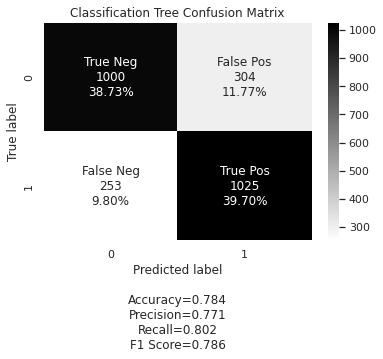

In [228]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Classification Tree Confusion Matrix')

In [229]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  2025 correct predictions
 The result is telling us that we have:  557 incorrect predictions
 We have a total predictions of:  2582


In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1304
           1       0.77      0.80      0.79      1278

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582



The precision of class 1 in the test set, that is the positive predicted value of our model, tells us out of all the “bad” loan applicants which our model has identified how many were actually “bad” loan applicants. So, **77% of the “bad” loan applicants which our model managed to identify were actually “bad” loan applicants.** <p>
The recall of class 1 in the test set, that is the sensitivity of our model, tells us how many “bad” loan applicants our model has managed to identify out of all the “bad” loan applicants existing in our test set. So, our model managed to identify **80% “bad” loan applicants out of all the “bad” loan applicants existing in the test set.**

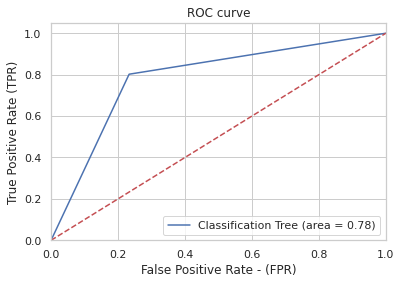

ROC-AUC-score:  0.784452797219582


In [231]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, classification_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classification_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC-score: ', roc_auc_score(y_test, y_pred))

## Artifical Neural Networks

In [232]:
import tensorflow as tf
tf.__version__

'2.8.2'

###Building the ANN

In [233]:
#initializing the ann
ann = tf.keras.models.Sequential()

#adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#adding the second layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [234]:
#compiling the ann
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [235]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
54/54 [==============================] - 5s 3ms/step - loss: 400.1886 - accuracy: 0.5174 - auc: 0.5174
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 188.9996 - accuracy: 0.5331 - auc: 0.5349
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 125.6964 - accuracy: 0.5122 - auc: 0.5141
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 80.1459 - accuracy: 0.5087 - auc: 0.5090
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 51.8377 - accuracy: 0.5093 - auc: 0.5141
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 29.5356 - accuracy: 0.5029 - auc: 0.5079
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 15.0263 - accuracy: 0.4971 - auc: 0.5081
Epoch 8/100
54/54 [==============================] - 0s 4ms/step - loss: 8.6801 - accuracy: 0.5169 - auc: 0.5275
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 9.8208 - accu

In [236]:
from sklearn.metrics import accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print('Accuracy of Artificial Neural Network classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Artificial Neural Network classifier on test set: 0.67


In [237]:
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

def make_confusion_matrix(cm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE

  blanks = ['' for i in range(cm.size)]

  if group_names and len(group_names)==cm.size:
      group_labels = ['{}\n'.format(value) for value in group_names]
  else:
        group_labels = blanks

  if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cm.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  else:
        group_percentages = blanks

  box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS

  if sum_stats:
      #Accuracy is sum of diagonal divided by total observations
      accuracy  = np.trace(cm) / float(np.sum(cm))

      #if it is a binary confusion matrix, show some more stats
      if len(cm)==2:
          #Metrics for Binary Confusion Matrices
          precision = cm[1,1] / sum(cm[:,1])
          recall    = cm[1,1] / sum(cm[1,:])
          f1_score  = 2*precision*recall / (precision + recall)
          stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
              accuracy,precision,recall,f1_score)
      else:
          stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
  else:
        stats_text = ''

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS

  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(cm,annot=box_labels,fmt='',cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
      plt.ylabel('True label')
      plt.xlabel('Predicted label' + stats_text)
  else:
      plt.xlabel(stats_text)
    
  if title:
      plt.title(title)

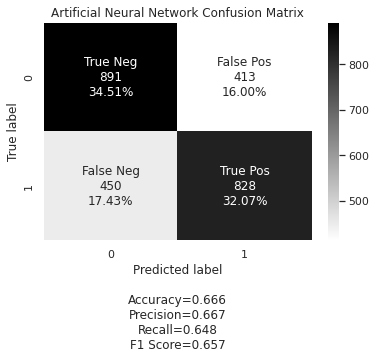

In [238]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='Artificial Neural Network Confusion Matrix')

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1304
           1       0.67      0.65      0.66      1278

    accuracy                           0.67      2582
   macro avg       0.67      0.67      0.67      2582
weighted avg       0.67      0.67      0.67      2582



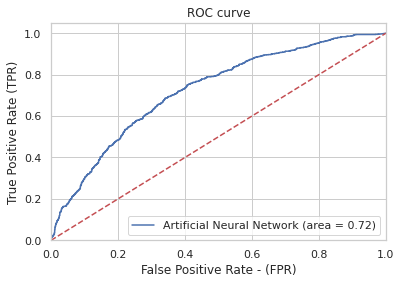

ROC-AUC-score:  0.6655847662663095


In [240]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, ann.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ann.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC-score: ', roc_auc_score(y_test, y_pred))

##**XGBoost Model**

In [241]:
from xgboost import XGBClassifier
X = df_standard.loc[:, df_standard.columns != 'loan_status_bin']
y = df_standard.loc[:, df_standard.columns == 'loan_status_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier()

In [242]:
from sklearn.metrics import accuracy_score
y_pred = xgboost.predict(X_test)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of XGBoost classifier on test set: 0.83


In [243]:
y_pred = np.where(y_pred > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

def make_confusion_matrix(cm,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE

  blanks = ['' for i in range(cm.size)]

  if group_names and len(group_names)==cm.size:
      group_labels = ['{}\n'.format(value) for value in group_names]
  else:
        group_labels = blanks

  if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cm.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  else:
        group_percentages = blanks

  box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS

  if sum_stats:
      #Accuracy is sum of diagonal divided by total observations
      accuracy  = np.trace(cm) / float(np.sum(cm))

      #if it is a binary confusion matrix, show some more stats
      if len(cm)==2:
          #Metrics for Binary Confusion Matrices
          precision = cm[1,1] / sum(cm[:,1])
          recall    = cm[1,1] / sum(cm[1,:])
          f1_score  = 2*precision*recall / (precision + recall)
          stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
              accuracy,precision,recall,f1_score)
      else:
          stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
  else:
        stats_text = ''

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS

  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(cm,annot=box_labels,fmt='',cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
      plt.ylabel('True label')
      plt.xlabel('Predicted label' + stats_text)
  else:
      plt.xlabel(stats_text)
    
  if title:
      plt.title(title)

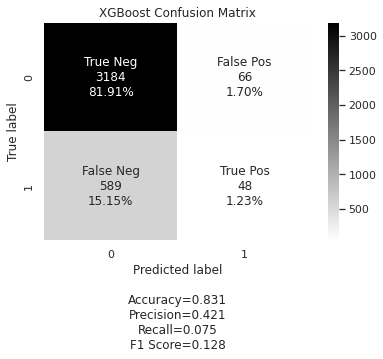

In [244]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='XGBoost Confusion Matrix')

In [245]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  3232 correct predictions
 The result is telling us that we have:  655 incorrect predictions
 We have a total predictions of:  3887


In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3250
           1       0.42      0.08      0.13       637

    accuracy                           0.83      3887
   macro avg       0.63      0.53      0.52      3887
weighted avg       0.77      0.83      0.78      3887



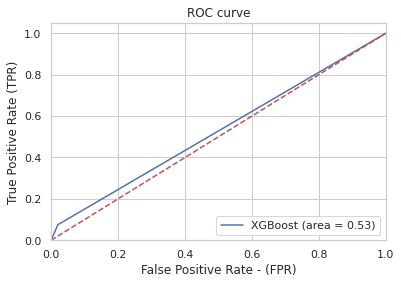

ROC-AUC-score:  0.5275227629513344


In [247]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, xgboost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgboost.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC-score: ', roc_auc_score(y_test, y_pred))